## 00-Document & Document Loaders


**Document란 무엇인가?**
- LangChain의 기본 문서 객체를 나타낸다.

**Document의 속성**
- page_content: 문서의 내용을 나타내는 문자열
- metadata: 문서의 메타데이터를 나타내는 딕셔너리리

In [4]:
from langchain_core.documents import Document

document = Document(page_content="랭체인의 도큐먼트.")

\_\_dict\_\_ 용도 

클래스 객체의 속성 정보를 확인하기 위해 사용
객체가 가진 여러가지 속성들을 딕셔너리 형태로 편하게 확인할 수 있다.

In [ ]:
#도큐먼트의 속성을 확인한다.
document.__dict__

{'id': None, 'metadata': {}, 'page_content': '랭체인의 도큐먼트.', 'type': 'Document'}

metadata에 속성 추가가

In [7]:
#메타데이터를 추가 합니다
document.metadata["source"] = "jsyNote"
document.metadata["page"] = "1"
document.metadata["author"] = "jsy"

In [8]:
# 추가한 메타데이터가 잘 추가되었는지 확인
document.metadata

{'source': 'jsyNote', 'page': '1', 'author': 'jsy'}

## Document Loader

다양한 파일의 형식으로부터 불러온 내용을 문서 객체로 변환하는 역할을 합니다.

## 사용하는 주요 Loader
- PyPDFLoader
- CSVLoader
- UnstructuredHTMLLoader
- JSONLoader
- TextLoader
- DirectoryLoader

In [13]:
# 파일의 경로를 FILE_PATH 변수에 저장
FILE_PATH = "./data/SPRI_AI_Brief_2023년12월호_F.pdf"

In [14]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(FILE_PATH)

load()

문서를 로드하여 List[Document] 형태로 반환합니다.

In [15]:
#PDF 로더
docs = loader.load()

# 로드된 문서의 수 확인 : 몇 페이저로 이루어져있는지지
len(docs)

23

In [16]:
# 목차 내용 확인
docs[2]

Document(metadata={'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'author': 'dj', 'moddate': '2023-12-08T13:28:38+09:00', 'pdfversion': '1.4', 'source': './data/SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'page': 2, 'page_label': '3'}, page_content='Ⅰ. 인공지능 산업 동향 브리프')

load_and_split()

splitter 를 사용하여 문서를 분할하고 반환할 수 있습니다.

In [29]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# 분할기 설정 chunk_size 텍스트를 200개 기준으로 나눈다, chunk_overlap 덩어리가 겹치는 개수를 지정한다. -> chunk_size가 커질수록 문서의 길이가 짧아진다.
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=0)

# 예제 파일 경로
FILE_PATH = "./data/SPRI_AI_Brief_2023년12월호_F.pdf"

# 로더 설정
loader = PyPDFLoader(FILE_PATH)

# 문서 분할
split_docs = loader.load_and_split(text_splitter=text_splitter)

# 로드된 문서의 수 확인
print(f"문서의 길이: {len(split_docs)}")

# 첫번째 문서 확인
split_docs[1]

문서의 길이: 174


Document(metadata={'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'author': 'dj', 'moddate': '2023-12-08T13:28:38+09:00', 'pdfversion': '1.4', 'source': './data/SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'page': 1, 'page_label': '2'}, page_content='2023 년 12월호\nⅠ. 인공지능 산업 동향 브리프\n 1. 정책/법제 \n   ▹ 미국, 안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 발표  ························· 1\n   ▹ G7, 히로시마 AI 프로세스를 통해 AI 기업 대상 국제 행동강령에 합의··························· 2')

<img src="https://teddylee777.github.io/images/2024-02-06-rag-naver-news-qa/rag-1.png" width="800" height="400"/>

splitter를 사용했을 때 위와 같은 형태로 문서를 분할한다는 것을 확인할 수 있었다.

lazy_load()

generator 방식으로 문서를 로드한다.(generator 는 값을 한 번에 모두 메모리에 올려놓는 대신, 필요할 때 하나씩 값을 생성하여 반환하기 때문에 메모리 효율이 높습니다.)

In [30]:
loader.lazy_load()

<generator object PyPDFLoader.lazy_load at 0x000002947EA574C0>

In [35]:
# generator 방식으로 문서 로드
for doc in loader.lazy_load():
    print(doc.metadata)

{'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'author': 'dj', 'moddate': '2023-12-08T13:28:38+09:00', 'pdfversion': '1.4', 'source': './data/SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'page': 0, 'page_label': '1'}
{'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'author': 'dj', 'moddate': '2023-12-08T13:28:38+09:00', 'pdfversion': '1.4', 'source': './data/SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'page': 1, 'page_label': '2'}
{'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'author': 'dj', 'moddate': '2023-12-08T13:28:38+09:00', 'pdfversion': '1.4', 'source': './data/SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'page': 2, 'page_label': '3'}
{'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 

aload()

비동기(Async) 방식의 문서 로드

In [32]:
# 문서를 async 방식으로 로드
adocs = loader.aload()

In [33]:
await adocs

[Document(metadata={'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'author': 'dj', 'moddate': '2023-12-08T13:28:38+09:00', 'pdfversion': '1.4', 'source': './data/SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'page': 0, 'page_label': '1'}, page_content='2023 년 12월호'),
 Document(metadata={'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'author': 'dj', 'moddate': '2023-12-08T13:28:38+09:00', 'pdfversion': '1.4', 'source': './data/SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'page': 1, 'page_label': '2'}, page_content='2023 년 12월호\nⅠ. 인공지능 산업 동향 브리프\n 1. 정책/법제 \n   ▹ 미국, 안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 발표  ························· 1\n   ▹ G7, 히로시마 AI 프로세스를 통해 AI 기업 대상 국제 행동강령에 합의··························· 2\n   ▹ 영국 AI 안전성 정상회의에 참가한 28개국, AI 위험에 공동 대응 선언··························· 3\n   ▹ 미국 법원, 예술가들이 생성 AI 기업에 제기한 저작권 소송 기각···············

## 01-PDF



AutoRAG 팀에서 진행한 PDF 실험 순위표

아래 표기된 숫자는 등수를 나타냅니다. (The lower, the better)

각 분류 문서에 따라 PDF를 로더해 본것을 바탕으로 진행

| | PDFMiner | PDFPlumber | PyPDFium2 | PyMuPDF | PyPDF2 |
|----------|:---------:|:----------:|:---------:|:-------:|:-----:|
| Medical  | 1         | 2          | 3         | 4       | 5     |
| Law      | 3         | 1          | 1         | 3       | 5     |
| Finance  | 1         | 2          | 2         | 4       | 5     |
| Public   | 1         | 1          | 1         | 4       | 5     |
| Sum      | 5         | 5          | 7         | 15      | 20    |

출처: [AutoRAG Medium 블로그](https://velog.io/@autorag/PDF-%ED%95%9C%EA%B8%80-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EC%B6%94%EC%B6%9C-%EC%8B%A4%ED%97%98#%EC%B4%9D%ED%8F%89)

PDFMiner, PDFPlumber, PyPDFium2, PyMuPDF, PyPDF2 는 무료 + 많은 사람들이 사용하고 있는 라이브러리리

In [1]:
# API Key를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
FILE_PATH = "./data/SPRI_AI_Brief_2023년12월호_F.pdf"

In [ ]:
#show_metadata 함수를 정의 한다.
def show_metadata(docs):
    if docs:
        print("[metadata]")
        print(list(docs[0].metadata.keys()))
        print("\n[examples]")
        max_key_length = max(len(k) for k in docs[0].metadata.keys())
        for k, v in docs[0].metadata.items():
            print(f"{k:<{max_key_length}} : {v}")

In [13]:
show_metadata(docs)

[metadata]
['producer', 'creator', 'creationdate', 'author', 'moddate', 'pdfversion', 'source', 'total_pages', 'page', 'page_label']

[examples]
producer     : Hancom PDF 1.3.0.542
creator      : Hwp 2018 10.0.0.13462
creationdate : 2023-12-08T13:28:38+09:00
author       : dj
moddate      : 2023-12-08T13:28:38+09:00
pdfversion   : 1.4
source       : ./data/SPRI_AI_Brief_2023년12월호_F.pdf
total_pages  : 23
page         : 0
page_label   : 1


pyPDF

pyPDF를 사용하여 PDF를 문서 배열로 로드하며, 각 문서는 page 번호와 함께 페이지 내용 및 메타데이터를 포함시켜 출력해봅니다.

In [20]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(FILE_PATH)

docs = loader.load()

# 4번째 페이지의 첫 시작 부터 400까지 텍스트 출력력
print(docs[3].page_content[:300])

1. 정책/법제  2. 기업/산업 3. 기술/연구  4. 인력/교육
미국, 안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 발표 
n미국 바이든 대통령이 ‘안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 ’에 서명하고 
광범위한 행정 조치를 명시
n행정명령은 △AI의 안전과 보안 기준 마련 △개인정보보호 △형평성과 시민권 향상 △소비자 
보호 △노동자 지원 △혁신과 경쟁 촉진 △국제협력을 골자로 함KEY Contents
£바이든 대통령 , AI 행정명령 통해 안전하고 신뢰할 수 있는 AI 개발과 활용 추진
n미


In [14]:
# 메타데이터 출력
show_metadata(docs)

[metadata]
['producer', 'creator', 'creationdate', 'author', 'moddate', 'pdfversion', 'source', 'total_pages', 'page', 'page_label']

[examples]
producer     : Hancom PDF 1.3.0.542
creator      : Hwp 2018 10.0.0.13462
creationdate : 2023-12-08T13:28:38+09:00
author       : dj
moddate      : 2023-12-08T13:28:38+09:00
pdfversion   : 1.4
source       : ./data/SPRI_AI_Brief_2023년12월호_F.pdf
total_pages  : 23
page         : 0
page_label   : 1


PyPDF(OCR)

일부 PDF에는 스캔된 문서나 그림 내에 텍스트 이미지가 포함되어있고 이를 추출하기 위해서 사용하는 것이 rapidocr-onnxruntime 패키지이다.

In [ ]:
# PDF 로더 초기화, 이미지 추출 옵션 extract_images 활성화화
loader = PyPDFLoader("https://arxiv.org/pdf/2103.15348.pdf", extract_images=True)

# PDF 페이지 로드
docs = loader.load()

# 페이지 내용 접근
print(docs[4].page_content[:300])

LayoutParser : A Uniﬁed Toolkit for DL-Based DIA 5
Table 1: Current layout detection models in the LayoutParser model zoo
Dataset Base Model1Large Model Notes
PubLayNet [38] F / M M Layouts of modern scientiﬁc documents
PRImA [3] M - Layouts of scanned modern magazines and scientiﬁc reports
Newspape


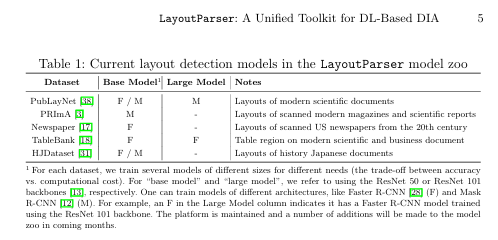

In [16]:
show_metadata(docs)

[metadata]
['producer', 'creator', 'creationdate', 'author', 'keywords', 'moddate', 'ptex.fullbanner', 'subject', 'title', 'trapped', 'source', 'total_pages', 'page', 'page_label']

[examples]
producer        : pdfTeX-1.40.21
creator         : LaTeX with hyperref
creationdate    : 2021-06-22T01:27:10+00:00
author          : 
keywords        : 
moddate         : 2021-06-22T01:27:10+00:00
ptex.fullbanner : This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2
subject         : 
title           : 
trapped         : /False
source          : https://arxiv.org/pdf/2103.15348.pdf
total_pages     : 16
page            : 0
page_label      : 1


PyMuPDF

PyMuPDF는 속도 최적화가 되어 있으며, PDF 및 해당 페이지에 대한 자세한 메타데이터를 포함하고 있다.

In [21]:
from langchain_community.document_loaders import PyMuPDFLoader

# PyMuPDF 로더 인스턴스 생성
loader = PyMuPDFLoader(FILE_PATH)

# 문서 로드
docs = loader.load()

# 문서의 내용 출력
print(docs[3].page_content[:300])

1. 정책/법제  
2. 기업/산업 
3. 기술/연구 
 4. 인력/교육
미국, 안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 발표 
n 미국 바이든 대통령이 ‘안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령’에 서명하고 
광범위한 행정 조치를 명시
n 행정명령은 △AI의 안전과 보안 기준 마련 △개인정보보호 △형평성과 시민권 향상 △소비자 
보호 △노동자 지원 △혁신과 경쟁 촉진 △국제협력을 골자로 함
KEY Contents
£ 바이든 대통령, AI 행정명령 통해 안전하고 신뢰할 수 있는 AI 개발과 활용 


In [18]:
show_metadata(docs)

[metadata]
['producer', 'creator', 'creationdate', 'source', 'file_path', 'total_pages', 'format', 'title', 'author', 'subject', 'keywords', 'moddate', 'trapped', 'modDate', 'creationDate', 'page']

[examples]
producer     : Hancom PDF 1.3.0.542
creator      : Hwp 2018 10.0.0.13462
creationdate : 2023-12-08T13:28:38+09:00
source       : ./data/SPRI_AI_Brief_2023년12월호_F.pdf
file_path    : ./data/SPRI_AI_Brief_2023년12월호_F.pdf
total_pages  : 23
format       : PDF 1.4
title        : 
author       : dj
subject      : 
keywords     : 
moddate      : 2023-12-08T13:28:38+09:00
trapped      : 
modDate      : D:20231208132838+09'00'
creationDate : D:20231208132838+09'00'
page         : 0


Unstructured

Markdown이나 PDF와 같은 비구조화 또는 반구조화된 파일 형식을 다루기 위한 공통 인터페이스를 지원

In [ ]:
# 자연어 처리하는 부분에서 에러가 발생하여 nltk 라이브러리를 import하여 처리가 가능하도록 하였음.
import nltk
nltk.download('punkt')  # 텍스트 문장과 단어 분리 모델
nltk.download('averaged_perceptron_tagger')  #품사 태깅을 위한 모델(각 단어가 어떤 품사에 속하는지 태깅깅)

from langchain_community.document_loaders import UnstructuredPDFLoader

# UnstructuredPDFLoader 인스턴스 생성
loader = UnstructuredPDFLoader(FILE_PATH)

# 데이터 로드
docs = loader.load()

# 문서의 내용 출력
print(docs[0].page_content[:300])

2023년 12월호

2023년 12월호

Ⅰ. 인공지능 산업 동향 브리프

1. 정책/법제

▹ 미국, 안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 발표 ························· 1

▹ G7, 히로시마 AI 프로세스를 통해 AI 기업 대상 국제 행동강령에 합의 ··························· 2

▹ 영국 AI 안전성 정상회의에 참가한 28개국, AI 위험에 공동 대응 선언 ··························· 3

▹ 미국 법원, 예술가들이 생성 AI 기업에 제


**구조화된 데이터 vs. 비구조화된 데이터**

구조화된 데이터는 일반적으로 표 형식이나 데이터베이스에서처럼 일관된 규칙과 포맷을 가진 데이터를 말합니다.  
예를 들어, CSV 파일이나 SQL 데이터베이스에서 데이터를 찾을 수 있습니다.  
각 항목이나 값들이 명확히 정의된 필드에 들어갑니다.


비구조화된 데이터는 일정한 구조나 형식이 없어서 쉽게 처리하기 어려운 데이터를 말합니다.  
PDF는 텍스트, 이미지, 표 등 다양한 형식의 정보를 포함하고 있지만,  
그 정보들이 일관된 데이터 모델로 표현되지 않아서 비구조화된 데이터라고 분류됩니다. 

In [33]:
show_metadata(docs)

[metadata]
['source']

[examples]
source : ./data/SPRI_AI_Brief_2023년12월호_F.pdf


In [ ]:
# UnstructuredPDFLoader 인스턴스 생성(mode="elements") mode="elements"를 지정하여 요소간 분리 가능
loader = UnstructuredPDFLoader(FILE_PATH, mode="elements")

# 데이터 로드
docs = loader.load()

# 문서의 내용 출력 시에는 content 지정 X 어차피 분리된 요소만 출력되기 때문에 content 사이즈를 주는 것은 무의미 하였음.
print(docs[0].page_content)

2023년 12월호


In [44]:
set(doc.metadata["category"] for doc in docs)  # 데이터 카테고리 추출

{'ListItem', 'NarrativeText', 'Title', 'UncategorizedText'}

In [45]:
show_metadata(docs)

[metadata]
['source', 'coordinates', 'filename', 'file_directory', 'last_modified', 'filetype', 'page_number', 'links', 'category', 'element_id']

[examples]
source         : ./data/SPRI_AI_Brief_2023년12월호_F.pdf
coordinates    : {'points': ((256.579467, 282.444348), (256.579467, 303.42387300000007), (355.4236898438, 303.42387300000007), (355.4236898438, 282.444348)), 'system': 'PixelSpace', 'layout_width': 612, 'layout_height': 858}
filename       : SPRI_AI_Brief_2023년12월호_F.pdf
file_directory : ./data
last_modified  : 2025-03-24T17:31:29
filetype       : application/pdf
page_number    : 1
links          : []
category       : UncategorizedText
element_id     : 89dc467f70b667fab1f9948a5ff32423


**PyPDFium2**

In [48]:
from langchain_community.document_loaders import PyPDFium2Loader

# PyPDFium2 로더 인스턴스 생성
loader = PyPDFium2Loader(FILE_PATH)

# 데이터 로드
docs = loader.load()

# 문서의 내용 출력
print(docs[10].page_content[:300])

SPRi AI Brief | 
2023-12월호
8
코히어, 데이터 투명성 확보를 위한 데이터 출처 탐색기 공개
n 코히어와 12개 기관이 광범위한 데이터셋에 대한 감사를 통해 원본 데이터 출처, 재라이선스 상태, 작성자 등 다양한 정보를 제공하는 ‘데이터 출처 탐색기’ 플랫폼을 출시
n 대화형 플랫폼을 통해 개발자는 데이터셋의 라이선스 상태를 쉽게 파악할 수 있으며 데이터셋의 
구성과 계보도 추적 가능
KEY Contents
£ 데이터 출처 탐색기, 광범위한 데이터셋 정보 제공을 통해 데이터 투명성 향상
n AI 기업 코히어(Co


In [49]:
show_metadata(docs)

[metadata]
['title', 'author', 'subject', 'keywords', 'creator', 'producer', 'creationdate', 'moddate', 'source', 'total_pages', 'page']

[examples]
title        : 
author       : dj
subject      : 
keywords     : 
creator      : Hwp 2018 10.0.0.13462
producer     : Hancom PDF 1.3.0.542
creationdate : 2023-12-08T13:28:38+09:00
moddate      : 2023-12-08T13:28:38+09:00
source       : ./data/SPRI_AI_Brief_2023년12월호_F.pdf
total_pages  : 23
page         : 0


**PDFMiner**

In [51]:
from langchain_community.document_loaders import PDFMinerLoader

# PDFMiner 로더 인스턴스 생성
loader = PDFMinerLoader(FILE_PATH)

# 데이터 로드
docs = loader.load()

# 문서의 내용 출력
print(docs[0].page_content[:300])

2023년  12월호
2023년  12월호

Ⅰ.  인공지능  산업  동향  브리프

  1.  정책/법제 

      ▹  미국,  안전하고  신뢰할  수  있는  AI  개발과  사용에  관한  행정명령  발표    ························· 1

      ▹  G7,  히로시마  AI  프로세스를  통해  AI  기업  대상  국제  행동강령에  합의 ··························· 2

      ▹  영국  AI  안전성  정상회의에  참가한  28개국,  AI  위험에  공동  


In [52]:
show_metadata(docs)

[metadata]
['author', 'creator', 'producer', 'creationdate', 'moddate', 'pdfversion', 'total_pages', 'source']

[examples]
author       : dj
creator      : Hwp 2018 10.0.0.13462
producer     : Hancom PDF 1.3.0.542
creationdate : 2023-12-08T13:28:38+09:00
moddate      : 2023-12-08T13:28:38+09:00
pdfversion   : 1.4
total_pages  : 23
source       : ./data/SPRI_AI_Brief_2023년12월호_F.pdf


**PDFMiner를 사용하여 HTML 텍스트 생성**

PDFMinerPDFasHTMLLoader를 사용하여 PDF문서를 HTML 형식으로 변환하여 로드해본다.

In [58]:
from langchain_community.document_loaders import PDFMinerPDFasHTMLLoader

# PDFMinerPDFasHTMLLoader 인스턴스 생성
loader = PDFMinerPDFasHTMLLoader(FILE_PATH)

# 문서 로드
docs = loader.load()

# 문서의 내용 출력
print(docs[0].page_content[:1000])

<html><head>
<meta http-equiv="Content-Type" content="text/html">
</head><body>
<span style="position:absolute; border: gray 1px solid; left:0px; top:50px; width:612px; height:858px;"></span>
<div style="position:absolute; top:50px;"><a name="1">Page 1</a></div>
<div style="position:absolute; border: textbox 1px solid; writing-mode:lr-tb; left:256px; top:332px; width:98px; height:20px;"><span style="font-family: KoPubDotumBold; font-size:14px">2023년  </span><span style="font-family: KoPubDotumBold; font-size:20px">12</span><span style="font-family: KoPubDotumBold; font-size:14px">월호
<br></span></div><div style="position:absolute; border: figure 1px solid; writing-mode:False; left:0px; top:50px; width:612px; height:858px;"></div><span style="position:absolute; border: gray 1px solid; left:0px; top:958px; width:612px; height:858px;"></span>
<div style="position:absolute; top:958px;"><a name="2">Page 2</a></div>
<div style="position:absolute; border: textbox 1px solid; writing-mode:lr-tb;

In [56]:
show_metadata(docs)

[metadata]
['source']

[examples]
source : ./data/SPRI_AI_Brief_2023년12월호_F.pdf


In [57]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(docs[0].page_content, "html.parser")  # HTML 파서 초기화
content = soup.find_all("div")  # 모든 div 태그 검색

In [59]:
import re

cur_fs = None
cur_text = ""
snippets = []  # 동일한 글꼴 크기의 모든 스니펫 수집
for c in content:
    sp = c.find("span")
    if not sp:
        continue
    st = sp.get("style")
    if not st:
        continue
    fs = re.findall("font-size:(\d+)px", st)
    if not fs:
        continue
    fs = int(fs[0])
    if not cur_fs:
        cur_fs = fs
    if fs == cur_fs:
        cur_text += c.text
    else:
        snippets.append((cur_text, cur_fs))
        cur_fs = fs
        cur_text = c.text
snippets.append((cur_text, cur_fs))
# 중복 스니펫 제거 전략 추가 가능성 (PDF의 헤더/푸터가 여러 페이지에 걸쳐 나타나므로 중복 발견 시 중복 정보로 간주 가능)

In [61]:
from langchain_core.documents import Document

cur_idx = -1
semantic_snippets = []
# 제목 가정: 높은 글꼴 크기
for s in snippets:
    # 새 제목 판별: 현재 스니펫 글꼴 > 이전 제목 글꼴
    if (
        not semantic_snippets
        or s[1] > semantic_snippets[cur_idx].metadata["heading_font"]
    ):
        metadata = {"heading": s[0], "content_font": 0, "heading_font": s[1]}
        metadata.update(docs[0].metadata)
        semantic_snippets.append(Document(page_content="", metadata=metadata))
        cur_idx += 1
        continue

    # 동일 섹션 내용 판별: 현재 스니펫 글꼴 <= 이전 내용 글꼴
    if (
        not semantic_snippets[cur_idx].metadata["content_font"]
        or s[1] <= semantic_snippets[cur_idx].metadata["content_font"]
    ):
        semantic_snippets[cur_idx].page_content += s[0]
        semantic_snippets[cur_idx].metadata["content_font"] = max(
            s[1], semantic_snippets[cur_idx].metadata["content_font"]
        )
        continue

    # 새 섹션 생성 조건: 현재 스니펫 글꼴 > 이전 내용 글꼴, 이전 제목 글꼴 미만
    metadata = {"heading": s[0], "content_font": 0, "heading_font": s[1]}
    metadata.update(docs[0].metadata)
    semantic_snippets.append(Document(page_content="", metadata=metadata))
    cur_idx += 1

print(semantic_snippets[4])

page_content='KEY Contents
n 미국 바이든 대통령이 ‘안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령’에 서명하고 
광범위한  행정  조치를  명시
n 행정명령은 △AI의 안전과 보안 기준 마련 △개인정보보호 △형평성과 시민권 향상 △소비자 
보호  △노동자  지원  △혁신과  경쟁  촉진  △국제협력을  골자로  함
' metadata={'heading': '미국,  안전하고  신뢰할  수  있는  AI  개발과  사용에  관한  행정명령  발표 \n', 'content_font': 12, 'heading_font': 15, 'source': './data/SPRI_AI_Brief_2023년12월호_F.pdf'}


PyPDFDirectoryLoader 를 통해 디렉토리에서 PDF 로드

In [ ]:
from langchain_community.document_loaders import PyPDFDirectoryLoader

# 디렉토리 경로
loader = PyPDFDirectoryLoader("data/")

# 문서 로드
docs = loader.load()

# 문서의 장수 출력 -> data/ 디렉토리 안에있는 PDF 장수를 모두 출력함
print(len(docs))

46


In [75]:
# 문서의 내용 출력
print(docs[0].page_content[:300])

2023 년 12월호


In [ ]:
# metadata 출력시에는 위에서 부터 긁어와서 출력을 진행하는 듯.
print(docs[0].metadata)

{'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'author': 'dj', 'moddate': '2023-12-08T13:28:38+09:00', 'pdfversion': '1.4', 'source': 'data\\SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'page': 0, 'page_label': '1'}


PDFPlumber

PyMuPDF와 마찬가지로, 출력 문서는 PDF와 그 페이지에 대한 자세한 메타데이터를 포함, 페이지 당 하나의 문서 반환

In [77]:
from langchain_community.document_loaders import PDFPlumberLoader

# PDF 문서 로더 인스턴스 생성
loader = PDFPlumberLoader(FILE_PATH)

# 문서 로딩
docs = loader.load()

# 첫 번째 문서 데이터 접근
print(docs[10].page_content[:300])

SPRi AI Brief |
2023-12월호
코히어, 데이터 투명성 확보를 위한 데이터 출처 탐색기 공개
KEY Contents
n 코히어와 12개 기관이 광범위한 데이터셋에 대한 감사를 통해 원본 데이터 출처, 재라이선스 상태,
작성자 등 다양한 정보를 제공하는 ‘데이터 출처 탐색기’ 플랫폼을 출시
n 대화형 플랫폼을 통해 개발자는 데이터셋의 라이선스 상태를 쉽게 파악할 수 있으며 데이터셋의
구성과 계보도 추적 가능
£데이터 출처 탐색기, 광범위한 데이터셋 정보 제공을 통해 데이터 투명성 향상
n AI 기업 코히어(Cohere)


In [78]:
show_metadata(docs)

[metadata]
['source', 'file_path', 'page', 'total_pages', 'Author', 'Creator', 'Producer', 'CreationDate', 'ModDate', 'PDFVersion']

[examples]
source       : ./data/SPRI_AI_Brief_2023년12월호_F.pdf
file_path    : ./data/SPRI_AI_Brief_2023년12월호_F.pdf
page         : 0
total_pages  : 23
Author       : dj
Creator      : Hwp 2018 10.0.0.13462
Producer     : Hancom PDF 1.3.0.542
CreationDate : D:20231208132838+09'00'
ModDate      : D:20231208132838+09'00'
PDFVersion   : 1.4


## 02-HWP

LangChain에는 아직 integration이 되지 않아 직접 구현한 HWPLoader를 사용해야한다

In [80]:
from langchain_teddynote.document_loaders import HWPLoader

# HWP Loader 객체 생성
loader = HWPLoader("./data/디지털 정부혁신 추진계획.hwp")

# 문서 로드
docs = loader.load()

In [ ]:
# 결과 출력 PDF와 다르게 페이지 인식을 못하는 것 같다. docs[] 변경 시 인식하지 못함.
print(docs[0].page_content[:1000])

디지털 정부혁신 추진계획2019. 10. 29.      관계부처 합동순    서Ⅰ. 개요ȃ 1Ⅱ. 디지털 정부혁신 추진계획ㆬȃ 2  1. 우선 추진과제ȃ 2     ① 선제적·통합적 대국민 서비스 혁신     ② 공공부문 마이데이터 활성화     ③ 시민참여를 위한 플랫폼 고도화     ④ 현장중심 협업을 지원하는 스마트 업무환경 구현     ⑤ 클라우드와 디지털서비스 이용 활성화     ⑥ 개방형 데이터·서비스 생태계 구축  2. 중장기 범정부 디지털 전환 로드맵 수립ᲈȃ 4Ⅲ. 추진체계 및 일정ȃ 4 [붙임] 디지털 정부혁신 우선 추진과제(상세)ᬜȃ 8Ⅰ. 개 요□ 추진 배경 ○ 우리나라는 국가적 초고속 정보통신망 투자와 적극적인 공공정보화 사업 추진에 힘입어 세계 최고수준의 전자정부를 구축‧운영     * UN전자정부평가에서 2010‧12‧14년 1위, 16‧18년 3위, UN공공행정상 13회 수상 ○ 그러나, 인공지능‧클라우드 중심의 디지털 전환(Digital Transformation) 시대가 도래함에 따라 기존 전자정부의 한계 표출   - 축적된 행정데이터에도 불구하고 기관간 연계‧활용 미흡, 부처 단위로 단절된 서비스, 신기술 활용을 위한 제도‧기반 부족   - 디지털 전환을 위한 컨트롤타워가 없고, 구체적 전략도 부재 ○ 이에, ‘19.3월부터 공공부문 ICT 활용현황 및 문제점 검토에 착수하여 공공분야 디지털 전환을 위한 추진계획 마련     * 관계부처 협의 21회(행안,과기정통,기재,복지,권익위,국정원 등), 민간전문가 의견청취 10회□ 문제점 진단 및 평가 ○ (서비스) 국민과 최종 이용자 관점에서 서비스 혁신 미흡   - 자격이 있어도 자신이 받을 수 있는 공공서비스를 파악하기 어려워 사각지대가 발생하고, 온라인 신청 가능한 서비스도 제한적 ○ (데이터) 기관별로 축적·보유한 데이터의 연계와 활용 부족   - A기관에서 서류를 발급받아 B기관에 제출하는 관행(연간 증명서 9.5억건‘18년 발급) 등 데이터가 국민편익 향상에 제대로 활용

In [ ]:
# len을 통해 확인해보니 출력되는 값이 1로 통짜 문서로 인식한다.
len(docs)

1

In [86]:
print(docs[0].page_content)

디지털 정부혁신 추진계획2019. 10. 29.      관계부처 합동순    서Ⅰ. 개요ȃ 1Ⅱ. 디지털 정부혁신 추진계획ㆬȃ 2  1. 우선 추진과제ȃ 2     ① 선제적·통합적 대국민 서비스 혁신     ② 공공부문 마이데이터 활성화     ③ 시민참여를 위한 플랫폼 고도화     ④ 현장중심 협업을 지원하는 스마트 업무환경 구현     ⑤ 클라우드와 디지털서비스 이용 활성화     ⑥ 개방형 데이터·서비스 생태계 구축  2. 중장기 범정부 디지털 전환 로드맵 수립ᲈȃ 4Ⅲ. 추진체계 및 일정ȃ 4 [붙임] 디지털 정부혁신 우선 추진과제(상세)ᬜȃ 8Ⅰ. 개 요□ 추진 배경 ○ 우리나라는 국가적 초고속 정보통신망 투자와 적극적인 공공정보화 사업 추진에 힘입어 세계 최고수준의 전자정부를 구축‧운영     * UN전자정부평가에서 2010‧12‧14년 1위, 16‧18년 3위, UN공공행정상 13회 수상 ○ 그러나, 인공지능‧클라우드 중심의 디지털 전환(Digital Transformation) 시대가 도래함에 따라 기존 전자정부의 한계 표출   - 축적된 행정데이터에도 불구하고 기관간 연계‧활용 미흡, 부처 단위로 단절된 서비스, 신기술 활용을 위한 제도‧기반 부족   - 디지털 전환을 위한 컨트롤타워가 없고, 구체적 전략도 부재 ○ 이에, ‘19.3월부터 공공부문 ICT 활용현황 및 문제점 검토에 착수하여 공공분야 디지털 전환을 위한 추진계획 마련     * 관계부처 협의 21회(행안,과기정통,기재,복지,권익위,국정원 등), 민간전문가 의견청취 10회□ 문제점 진단 및 평가 ○ (서비스) 국민과 최종 이용자 관점에서 서비스 혁신 미흡   - 자격이 있어도 자신이 받을 수 있는 공공서비스를 파악하기 어려워 사각지대가 발생하고, 온라인 신청 가능한 서비스도 제한적 ○ (데이터) 기관별로 축적·보유한 데이터의 연계와 활용 부족   - A기관에서 서류를 발급받아 B기관에 제출하는 관행(연간 증명서 9.5억건‘18년 발급) 등 데이터가 국민편익 향상에 제대로 활용

In [87]:
# 결과 출력
print(docs[0].metadata)

{'source': './data/디지털 정부혁신 추진계획.hwp'}


## 03-CSV Loader

CSV 파일은 쉼표로 값을 구분하는 텍스트 파일로 파일의 각 줄은 데이터 레코드 형태이다.

**CSVLoader**

CSV 데이터를 한 행씩 로드한다.

In [2]:
from langchain_community.document_loaders.csv_loader import CSVLoader

# CSV 로더 생성
loader = CSVLoader(file_path="./data/titanic.csv")

# 데이터 로드
docs = loader.load()

print(len(docs))
print(docs[0].metadata)

891
{'source': './data/titanic.csv', 'row': 0}


In [3]:
print(docs[1].page_content)

PassengerId: 2
Survived: 1
Pclass: 1
Name: Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Sex: female
Age: 38
SibSp: 1
Parch: 0
Ticket: PC 17599
Fare: 71.2833
Cabin: C85
Embarked: C


**CSV 파싱 및 로딩 커스터마이징**



In [ ]:
# 컬럼정보:
# PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked

#사용자 데이터를 구분된 데이터로 변환하는 writer 객체 반환

# CSV 파일 경로
loader = CSVLoader(
    file_path="./data/titanic.csv",
    csv_args={
        "delimiter": ",",  # 구분자
        "quotechar": '"',  # 인용 부호 문자
        "fieldnames": [
            "Passenger ID",
            "Survival (1: Survived, 0: Died)",
            "Passenger Class",
            "Name",
            "Sex",
            "Age",
            "Number of Siblings/Spouses Aboard",
            "Number of Parents/Children Aboard",
            "Ticket Number",
            "Fare",
            "Cabin",
            "Port of Embarkation",
        ],  # 필드 이름
    },
)

# 데이터 로드
docs = loader.load()

# 데이터 출력
print(docs[1].page_content)

Passenger ID: 1
Survival (1: Survived, 0: Died): 0
Passenger Class: 3
Name: Braund, Mr. Owen Harris
Sex: male
Age: 22
Number of Siblings/Spouses Aboard: 1
Number of Parents/Children Aboard: 0
Ticket Number: A/5 21171
Fare: 7.25
Cabin: 
Port of Embarkation: S


문서 전체를 XML 문서 형식으로 처리 진행하기기

In [9]:
#출력을 줄 단위로 나누고 각 줄을 :콜론 기준으로 분리하여 XML 구조로변환한다.

row = docs[1].page_content.split("\n") #문자열을 줄 단위로 나누어 리스트 row 저장
row_str = "<row>"
for element in row:
    splitted_element = element.split(":") #콜론 기준으로 분리
    value = splitted_element[-1] #콜론 뒷부분을 value에 저장
    col = ":".join(splitted_element[:-1]) #콜론 앞부분을 col에 저장
    row_str += f"<{col}>{value.strip()}</{col}>" #각 변수를 형식에 맞추어 저장
row_str += "</row>"
print(row_str) #출력력

<row><Passenger ID>1</Passenger ID><Survival (1: Survived, 0: Died)>0</Survival (1: Survived, 0: Died)><Passenger Class>3</Passenger Class><Name>Braund, Mr. Owen Harris</Name><Sex>male</Sex><Age>22</Age><Number of Siblings/Spouses Aboard>1</Number of Siblings/Spouses Aboard><Number of Parents/Children Aboard>0</Number of Parents/Children Aboard><Ticket Number>A/5 21171</Ticket Number><Fare>7.25</Fare><Cabin></Cabin><Port of Embarkation>S</Port of Embarkation></row>


In [ ]:
for doc in docs[1:]: #전체 문서 반복 실행 진행행
    row = doc.page_content.split("\n")
    row_str = "<row>"
    for element in row:
        splitted_element = element.split(":")
        value = splitted_element[-1]
        col = ":".join(splitted_element[:-1])
        row_str += f"<{col}>{value.strip()}</{col}>"
    row_str += "</row>"
    print(row_str)

<row><Passenger ID>1</Passenger ID><Survival (1: Survived, 0: Died)>0</Survival (1: Survived, 0: Died)><Passenger Class>3</Passenger Class><Name>Braund, Mr. Owen Harris</Name><Sex>male</Sex><Age>22</Age><Number of Siblings/Spouses Aboard>1</Number of Siblings/Spouses Aboard><Number of Parents/Children Aboard>0</Number of Parents/Children Aboard><Ticket Number>A/5 21171</Ticket Number><Fare>7.25</Fare><Cabin></Cabin><Port of Embarkation>S</Port of Embarkation></row>
<row><Passenger ID>2</Passenger ID><Survival (1: Survived, 0: Died)>1</Survival (1: Survived, 0: Died)><Passenger Class>1</Passenger Class><Name>Cumings, Mrs. John Bradley (Florence Briggs Thayer)</Name><Sex>female</Sex><Age>38</Age><Number of Siblings/Spouses Aboard>1</Number of Siblings/Spouses Aboard><Number of Parents/Children Aboard>0</Number of Parents/Children Aboard><Ticket Number>PC 17599</Ticket Number><Fare>71.2833</Fare><Cabin>C85</Cabin><Port of Embarkation>C</Port of Embarkation></row>
<row><Passenger ID>3</Pas

source_column 인자를 사용하여 각 행에서 생성된 문서의 출처를 지정

In [15]:
loader = CSVLoader(
    file_path="./data/titanic.csv", source_column="PassengerId"
)  # CSV 로더 설정, 파일 경로 및 소스 컬럼 지정

docs = loader.load()  # 데이터 로드

print(docs[1])  # 데이터 출력

page_content='PassengerId: 2
Survived: 1
Pclass: 1
Name: Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Sex: female
Age: 38
SibSp: 1
Parch: 0
Ticket: PC 17599
Fare: 71.2833
Cabin: C85
Embarked: C' metadata={'source': '2', 'row': 1}


**UnstructuredCSVLoader**

테이블을 로드할 수 있습니다. elements 모드에서 사용할 경우 메타데이터에서 테이블의 HTML 표현이 제공됩니다.

In [16]:
from langchain_community.document_loaders.csv_loader import UnstructuredCSVLoader

# 비구조화 CSV 로더 인스턴스 생성
loader = UnstructuredCSVLoader(file_path="./data/titanic.csv", mode="elements")

# 문서 로드
docs = loader.load()

# 첫 번째 문서의 HTML 텍스트 메타데이터 출력
print(docs[0].metadata["text_as_html"][:1000])

<table border="1" class="dataframe">
  <tbody>
    <tr>
      <td>1</td>
      <td>0</td>
      <td>3</td>
      <td>Braund, Mr. Owen Harris</td>
      <td>male</td>
      <td>22.00</td>
      <td>1</td>
      <td>0</td>
      <td>A/5 21171</td>
      <td>7.2500</td>
      <td></td>
      <td>S</td>
    </tr>
    <tr>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td>Cumings, Mrs. John Bradley (Florence Briggs Thayer)</td>
      <td>female</td>
      <td>38.00</td>
      <td>1</td>
      <td>0</td>
      <td>PC 17599</td>
      <td>71.2833</td>
      <td>C85</td>
      <td>C</td>
    </tr>
    <tr>
      <td>3</td>
      <td>1</td>
      <td>3</td>
      <td>Heikkinen, Miss. Laina</td>
      <td>female</td>
      <td>26.00</td>
      <td>0</td>
      <td>0</td>
      <td>STON/O2. 3101282</td>
      <td>7.9250</td>
      <td></td>
      <td>S</td>
    </tr>
    <tr>
      <td>4</td>
      <td>1</td>
      <td>1</td>
      <td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>


**DataFrameLoader**



In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("./data/titanic.csv") #파이썬에서 데이터 처리와 분석을 쉽게 할 수 있도록 도와주는 라이브러리리

In [18]:
# 데이터프레임의 처음 다섯 행 조회
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from langchain_community.document_loaders import DataFrameLoader

# 데이터 프레임 로더 설정, 페이지 내용 컬럼 지정 엑셀 내 특정 위치 데이터를 뽑아내는데 용이하다.
loader = DataFrameLoader(df, page_content_column="Name")

# 문서 로드
docs = loader.load()

# 데이터 출력
print(docs[0].page_content)

# 메타데이터 출력
print(docs[0].metadata)

Braund, Mr. Owen Harris
{'PassengerId': 1, 'Survived': 0, 'Pclass': 3, 'Sex': 'male', 'Age': 22.0, 'SibSp': 1, 'Parch': 0, 'Ticket': 'A/5 21171', 'Fare': 7.25, 'Cabin': nan, 'Embarked': 'S'}


In [ ]:
# 큰 테이블에 대한 지연 로딩, 전체 테이블을 메모리에 로드하지 않음
for row in loader.lazy_load(): #lazy_load를 사용하여 하나씩 값을 생성
    print(row)
    break  # 첫 행만 출력

page_content='Braund, Mr. Owen Harris' metadata={'PassengerId': 1, 'Survived': 0, 'Pclass': 3, 'Sex': 'male', 'Age': 22.0, 'SibSp': 1, 'Parch': 0, 'Ticket': 'A/5 21171', 'Fare': 7.25, 'Cabin': nan, 'Embarked': 'S'}


## 04-Excel



In [31]:
from langchain_community.document_loaders import UnstructuredExcelLoader
#import pandas as pd #기존 방식으로 엑셀 출력 시 RecursionError: maximum recursion depth exceeded while calling a Python object 오류 발생
# UnstructuredExcelLoader 생성
loader = UnstructuredExcelLoader("./data/titanic1.xlsx", mode="elements")

# 문서 로드
docs = loader.load()

#df = pd.read_excel("./data/titanic.xlsx")
# 문서 길이 출력
print(len(docs))

#print(df.head())

1


In [33]:
# 문서 출력
print(docs[0].page_content[:300])




PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


1
0
3
Braund, Mr. Owen Harris
male
22
1
0
A/5 21171
7.25

S


2
1
1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
female
38
1
0
PC 17599
71.2833
C85
C


3
1
3
Heikkinen, Miss. Laina
female
26
0
0
STON/O2. 3101


In [34]:
# metadata 의 text_as_html 출력
print(docs[0].metadata["text_as_html"][:1000])

<table border="1" class="dataframe">
  <tbody>
    <tr>
      <td>PassengerId</td>
      <td>Survived</td>
      <td>Pclass</td>
      <td>Name</td>
      <td>Sex</td>
      <td>Age</td>
      <td>SibSp</td>
      <td>Parch</td>
      <td>Ticket</td>
      <td>Fare</td>
      <td>Cabin</td>
      <td>Embarked</td>
    </tr>
    <tr>
      <td>1</td>
      <td>0</td>
      <td>3</td>
      <td>Braund, Mr. Owen Harris</td>
      <td>male</td>
      <td>22</td>
      <td>1</td>
      <td>0</td>
      <td>A/5 21171</td>
      <td>7.25</td>
      <td></td>
      <td>S</td>
    </tr>
    <tr>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td>Cumings, Mrs. John Bradley (Florence Briggs Thayer)</td>
      <td>female</td>
      <td>38</td>
      <td>1</td>
      <td>0</td>
      <td>PC 17599</td>
      <td>71.2833</td>
      <td>C85</td>
      <td>C</td>
    </tr>
    <tr>
      <td>3</td>
      <td>1</td>
      <td>3</td>
      <td>Heikkinen, Miss. Laina</td>
      <td>female</td>
 

**DataFrameLoader**

In [35]:
import pandas as pd

# Excel 파일 읽기
df = pd.read_excel("./data/titanic.xlsx")

In [36]:
from langchain_community.document_loaders import DataFrameLoader

# 데이터 프레임 로더 설정, 페이지 내용 컬럼 지정
loader = DataFrameLoader(df, page_content_column="Name")

# 문서 로드
docs = loader.load()

# 데이터 출력
print(docs[0].page_content)

# 메타데이터 출력
print(docs[0].metadata)

Braund, Mr. Owen Harris
{'PassengerId': 1, 'Survived': 0, 'Pclass': 3, 'Sex': 'male', 'Age': 22.0, 'SibSp': 1, 'Parch': 0, 'Ticket': 'A/5 21171', 'Fare': 7.25, 'Cabin': nan, 'Embarked': 'S'}


## 05-Microsoft Word

In [37]:
from langchain_community.document_loaders import Docx2txtLoader

loader = Docx2txtLoader("./data/sample-word-document.docx")  # 문서 로더 초기화

docs = loader.load()  # 문서 로딩

print(len(docs))

1


In [38]:
from langchain_community.document_loaders import UnstructuredWordDocumentLoader
# 비구조화 워드 문서 로더 인스턴스화
loader = UnstructuredWordDocumentLoader("./data/sample-word-document.docx")

# 문서 로드
docs = loader.load()

print(len(docs))

1


In [39]:
# metadata 출력
print(docs[0].metadata)

{'source': './data/sample-word-document.docx'}


In [ ]:
# UnstructuredWordDocumentLoader 의 elements 모드를 이용하여 요소들을 쉽게 분리할 수 있습니다.
loader = UnstructuredWordDocumentLoader(
    "./data/sample-word-document.docx", mode="elements"
)

# 데이터 로드
docs = loader.load()

# 로드한 문서의 개수 출력
print(len(docs))

125


In [45]:
# 첫번째 문서의 내용 출력
print(docs[0].page_content)

Semantic Search


In [42]:
# 첫번째 문서의 내용 출력
docs[0].metadata

{'source': './data/sample-word-document.docx',
 'filename': 'sample-word-document.docx',
 'file_directory': './data',
 'last_modified': '2025-03-17T17:18:54',
 'filetype': 'application/vnd.openxmlformats-officedocument.wordprocessingml.document',
 'category_depth': 0,
 'page_number': 1,
 'category': 'Title',
 'element_id': '3dd5e0592f44354ea795b26adff789ba'}

## 06-Microsoft PowerPoint

In [46]:
from langchain_community.document_loaders import UnstructuredPowerPointLoader

# UnstructuredPowerPointLoader 생성
loader = UnstructuredPowerPointLoader("./data/sample-ppt.pptx")

# 데이터 로드
docs = loader.load()

# 로드한 문서의 개수 출력
print(len(docs))

1


In [ ]:
# UnstructuredPowerPointLoader 생성
loader = UnstructuredPowerPointLoader("./data/sample-ppt.pptx", mode="elements") #요소에 따라 분리 -> 이미지, 텍스트 박스, 기호 등 유의미한 대상을 요소로 인식

# 데이터 로드
docs = loader.load()

print(len(docs))

17


In [ ]:
print(docs[5].page_content)

예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.


In [49]:
docs[0].metadata


{'source': './data/sample-ppt.pptx',
 'filename': 'sample-ppt.pptx',
 'file_directory': './data',
 'last_modified': '2025-03-17T17:18:54',
 'filetype': 'application/vnd.openxmlformats-officedocument.presentationml.presentation',
 'page_number': 1,
 'category': 'Title',
 'element_id': '026af4246954475333b4704ddff7954b'}

## 07-WebBaseLoader

In [ ]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

# 뉴스기사 내용을 로드합니다.
loader = WebBaseLoader(
    web_paths=("https://n.news.naver.com/article/437/0000378416",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            "div",
            attrs={"class": ["newsct_article _article_body", "media_end_head_title"]},
        )
    ),
    header_template={ #봇의 접근을 차단하는 사이트를 접근하기 위해 실제 User_Agent 헤더를 실어서 보낸다. 없어도 호출 됨.
        "User_Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36",
    },
)

docs = loader.load()
print(f"문서의 수: {len(docs)}")
docs

문서의 수: 1


[Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="\n출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책\n\n\n[앵커]올해 아이 낳을 계획이 있는 가족이라면 솔깃할 소식입니다. 정부가 저출생 대책으로 매달 주는 부모 급여, 0세 아이는 100만원으로 올렸습니다. 여기에 첫만남이용권, 아동수당까지 더하면 아이 돌까지 1년 동안 1520만원을 받습니다. 지자체도 경쟁하듯 지원에 나섰습니다. 인천시는 새로 태어난 아기, 18살될 때까지 1억원을 주겠다. 광주시도 17살될 때까지 7400만원 주겠다고 했습니다. 선거 때면 나타나서 아이 낳으면 현금 주겠다고 밝힌 사람이 있었죠. 과거에는 표만 노린 '황당 공약'이라는 비판이 따라다녔습니다. 그런데 지금은 출산율이 이보다 더 나쁠 수 없다보니, 이런 현금성 지원을 진지하게 정책화 하는 상황까지 온 겁니다. 게다가 기업들도 뛰어들고 있습니다. 이번에는 출산한 직원에게 단번에 1억원을 주겠다는 회사까지 나타났습니다.이상화 기자가 취재했습니다.[기자]한 그룹사가 오늘 파격적인 저출생 정책을 내놨습니다.2021년 이후 태어난 직원 자녀에 1억원씩, 총 70억원을 지원하고 앞으로도 이 정책을 이어가기로 했습니다.해당 기간에 연년생과 쌍둥이 자녀가 있으면 총 2억원을 받게 됩니다.[오현석/부영그룹 직원 : 아이 키우는 데 금전적으로 많이 힘든 세상이잖아요. 교육이나 생활하는 데 큰 도움이 될 거라 생각합니다.]만약 셋째까지 낳는 경우엔 국민주택을 제공하겠다는 뜻도 밝혔습니다.[이중근/부영그룹 회장 : 3년 이내에 세 아이를 갖는 분이 나올 것이고 따라서 주택을 제공할 수 있는 계기가 될 것으로 생각하고.][조용현/부영그룹 직원 : 와이프가 셋째도 갖고 싶어 했는데 경제적 부담 때문에 부정적이었거든요. (이제) 긍정적으로 생각할 수 있을 것 같습니다.]오늘 행사에서는, 회사가 제공하는 출산장려금은 받는 

In [62]:
# ssl 인증 우회
loader.requests_kwargs = {"verify": True}

# 데이터 로드
docs = loader.load()

In [78]:
#url의 리스트를 로더에 전달하여 여러 웹 페이지를 한 번에 로드할 수 있다.

loader = WebBaseLoader(
    web_paths=[
        "https://n.news.naver.com/article/437/0000378416",
        "https://n.news.naver.com/mnews/hotissue/article/092/0002340014?type=series&cid=2000063",
    ],
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            "div",
            attrs={"class": ["newsct_article _article_body", "media_end_head_title"]},
        )
    ),
    header_template={
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36",
    },
)

# 데이터 로드
docs = loader.aload()

# 문서 수 확인
print(len(docs))

Fetching pages: 100%|##########| 2/2 [00:00<00:00, 27.50it/s]

2


In [ ]:
print(docs[0].page_content[:500]) #첫번째 URL 기사 500자까지 호출
print("===" * 10)
print(docs[1].page_content[:500]) #두번째 URL 기사 500자까지 호출


출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책


[앵커]올해 아이 낳을 계획이 있는 가족이라면 솔깃할 소식입니다. 정부가 저출생 대책으로 매달 주는 부모 급여, 0세 아이는 100만원으로 올렸습니다. 여기에 첫만남이용권, 아동수당까지 더하면 아이 돌까지 1년 동안 1520만원을 받습니다. 지자체도 경쟁하듯 지원에 나섰습니다. 인천시는 새로 태어난 아기, 18살될 때까지 1억원을 주겠다. 광주시도 17살될 때까지 7400만원 주겠다고 했습니다. 선거 때면 나타나서 아이 낳으면 현금 주겠다고 밝힌 사람이 있었죠. 과거에는 표만 노린 '황당 공약'이라는 비판이 따라다녔습니다. 그런데 지금은 출산율이 이보다 더 나쁠 수 없다보니, 이런 현금성 지원을 진지하게 정책화 하는 상황까지 온 겁니다. 게다가 기업들도 뛰어들고 있습니다. 이번에는 출산한 직원에게 단번에 1억원을 주겠다는 회사까지 나타났습니다.이상화 기자가 취재했습니다.[기자]한 그룹사가 오늘 파격적인 저출생 정책을 내놨

고속 성장하는 스타트업엔 레드팀이 필요하다


[이균성의 溫技] 초심, 본질을 잃을 때한 스타트업 창업자와 최근 점심을 같이 했다. 조언을 구할 게 있다고 했다. 당장 급한 현안이 있는 건 아니었다. 여러 번 창업한 경험이 있는데 지금 하고 있는 아이템은 대박 느낌이 든다고 헸다. 그런데 오히려 더 조심해야겠다는 생각이 들더란다. 조언을 구하고자 하는 바도 성장이 예상될 때 무엇을 경계해야 할지 알고 싶다는 거였다. 적잖은 스타트업 창업자를 만났지만 드문 사례였다.2년 가까이 스타트업 창업자를 릴레이 인터뷰 하면서 의미 있게 생각했던 것이 두 가지 있다. 첫째, 회사라는 단어보다 팀이라는 어휘를 주로 쓰고 있다는 점이었다. 그 표현의 유래나 의미 때문이라기보다는 팀이라는 말이 더 정겨워 뜻 깊게 생각된 듯하다. 이해관계보다 지향하는 뜻에 더 중점을 두고 하나의 마음으로 한 곳을 향해 달려가는 집단을 가리키는 표현이라는 생각에 더 정겨웠다.스타트업 대표들의 창업 동기는 대부분 ‘사

In [79]:
# jupyter notebook 에서만 실행(asyncio)
import nest_asyncio #여러 코드를 한 번에 처리할 수 있도록 비동기 코드 실행을 가능 하도록 함.

nest_asyncio.apply()

In [80]:
# 초당 요청 수 설정
loader.requests_per_second = 1

# 비동기 로드
docs = loader.aload()

Fetching pages: 100%|##########| 2/2 [00:00<00:00, 12.72it/s]


In [81]:
# 결과 출력
docs

[Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="\n출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책\n\n\n[앵커]올해 아이 낳을 계획이 있는 가족이라면 솔깃할 소식입니다. 정부가 저출생 대책으로 매달 주는 부모 급여, 0세 아이는 100만원으로 올렸습니다. 여기에 첫만남이용권, 아동수당까지 더하면 아이 돌까지 1년 동안 1520만원을 받습니다. 지자체도 경쟁하듯 지원에 나섰습니다. 인천시는 새로 태어난 아기, 18살될 때까지 1억원을 주겠다. 광주시도 17살될 때까지 7400만원 주겠다고 했습니다. 선거 때면 나타나서 아이 낳으면 현금 주겠다고 밝힌 사람이 있었죠. 과거에는 표만 노린 '황당 공약'이라는 비판이 따라다녔습니다. 그런데 지금은 출산율이 이보다 더 나쁠 수 없다보니, 이런 현금성 지원을 진지하게 정책화 하는 상황까지 온 겁니다. 게다가 기업들도 뛰어들고 있습니다. 이번에는 출산한 직원에게 단번에 1억원을 주겠다는 회사까지 나타났습니다.이상화 기자가 취재했습니다.[기자]한 그룹사가 오늘 파격적인 저출생 정책을 내놨습니다.2021년 이후 태어난 직원 자녀에 1억원씩, 총 70억원을 지원하고 앞으로도 이 정책을 이어가기로 했습니다.해당 기간에 연년생과 쌍둥이 자녀가 있으면 총 2억원을 받게 됩니다.[오현석/부영그룹 직원 : 아이 키우는 데 금전적으로 많이 힘든 세상이잖아요. 교육이나 생활하는 데 큰 도움이 될 거라 생각합니다.]만약 셋째까지 낳는 경우엔 국민주택을 제공하겠다는 뜻도 밝혔습니다.[이중근/부영그룹 회장 : 3년 이내에 세 아이를 갖는 분이 나올 것이고 따라서 주택을 제공할 수 있는 계기가 될 것으로 생각하고.][조용현/부영그룹 직원 : 와이프가 셋째도 갖고 싶어 했는데 경제적 부담 때문에 부정적이었거든요. (이제) 긍정적으로 생각할 수 있을 것 같습니다.]오늘 행사에서는, 회사가 제공하는 출산장려금은 받는 

## 08-TXT Loader

In [90]:
from langchain_community.document_loaders import TextLoader

# 텍스트 로더 생성
loader = TextLoader("./data/appendix-keywords.txt")

# 문서 로드
docs = loader.load()
print(f"문서의 수: {len(docs)}\n")
print("[메타데이터]\n")
print(docs[0].metadata)
print("\n========= [앞부분] 미리보기 =========\n")
print(docs[0].page_content[:500])

RuntimeError: Error loading ./data/appendix-keywords.txt

**TextLoader를 통한 파일 인코딩 자동 감지**

In [ ]:
from langchain_community.document_loaders import DirectoryLoader

path = "data/"

text_loader_kwargs = {"autodetect_encoding": True} # 인코딩 전달 실패전에 인코딩을 자동으로 감지하도록 진행.

loader = DirectoryLoader(
    path,
    glob="**/*.txt",
    loader_cls=TextLoader,
    silent_errors=True, # silent_errors 매개변수를 전달하고 로드할 수 없는 파일을 건너뜀
    loader_kwargs=text_loader_kwargs,
)
docs = loader.load()